# REU 2021-06-08 Spatial Data - Challenge

## Instructions
**Your aim is to compute the southern hemisphere sea ice area for the month of March in 2020, and if you have time expand this code to download all months in 2020 and compute the sea ice area**

- **1 Download March 2020 Southern Hemisphere sea ice concentration data (monthly) from NSIDC from this [website](https://nsidc.org/data/g02202) using their FTP server. You are looking to use the data variable** `goddard_merged_seaice_conc_monthly`
- **2 Plot the data values and remove the pole hole, lakes, coastal, land, and missing_data (set values in these regions to np.nan), you'll want to use [`xarray.where`]
(http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html)**
- **3 Weight the gridded data and sum up the sea ice area (cell area x sea ice conentration per grid cell)**<br>

### Extension
- **4 Now download and compute the southern hemisphere sea ice area for all months from 2020**

## 1 Download March 2020 Southern Hemisphere data
### 1.1 Find the URL to use with wget to download the data
**Go to https://nsidc.org/data/g02202 and navigate to the 'Download Data' tab and click 'Go to FTP'**<br>
**Then open this in 'finder', you'll then want to navigate to** `south>monthly` **and find the correct file name for March 2020**<br>
**Use wget. Hinkt: the start of your URL should start with** `ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G02202_V3`

In [1]:
#use wget --spider to check you're downloading the correct file and its size
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import datetime
import cartopy.crs as ccrs
import os


In [2]:
#use wget
march_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202003_v03r01.nc')

/Users/atoc_reu_student/opt/anaconda3/envs/pangeo/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'melt_onset_day_seaice_conc_monthly_cdr' has multiple fill values {-1, 65535}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [ ]:
#check you directory to see if you need to unzip the file

## 1.2 Open the NetCDF file you downloaded and have a look at it
**Plot the variable** `goddard_merged_seaice_conc_monthly`

In [3]:
#open the netcdf file using xarray
march_2020

<xarray.Dataset>
Dimensions:                                 (time: 1, xgrid: 316, ygrid: 332)
Coordinates:
  * time                                    (time) datetime64[ns] 2020-03-01
  * ygrid                                   (ygrid) float32 4.338e+06 ... -3....
  * xgrid                                   (xgrid) float32 -3.938e+06 ... 3....
    latitude                                (ygrid, xgrid) float64 ...
    longitude                               (ygrid, xgrid) float64 ...
Data variables:
    projection                              |S1 ...
    seaice_conc_monthly_cdr                 (time, ygrid, xgrid) float32 ...
    stdev_of_seaice_conc_monthly_cdr        (time, ygrid, xgrid) float32 ...
    melt_onset_day_seaice_conc_monthly_cdr  (time, ygrid, xgrid) float32 ...
    qa_of_seaice_conc_monthly_cdr           (time, ygrid, xgrid) float32 ...
    goddard_merged_seaice_conc_monthly      (time, ygrid, xgrid) float32 ...
    goddard_nt_seaice_conc_monthly          (time, ygrid, xgrid) float32 ...
    goddard_bt_seaice_conc_monthly          (time, ygrid, xgrid) float32 ...
Attributes: (12/41)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    comment:                   The variable melt_onset_day_seaice_conc_monthl...
    program:                   NOAA Climate Data Record Program
    cdr_variable:              seaice_conc_monthly_cdr
    ...                        ...
    history:                   seaice_conc_monthly_sh_f17_202003_v03r01.nc cr...
    platform:                  DMSP 5D-3/F17 > Defense Meteorological Satelli...
    sensor:                    SSMI/S > Special Sensor Microwave Imager/Sounder
    date_created:              2021-03-23T23:41:52Z
    time_coverage_start:       2020-03-01T00:00:00Z
    time_coverage_end:         2020-03-31T23:59:59Z

In [ ]:
#look at the variables and corddinates

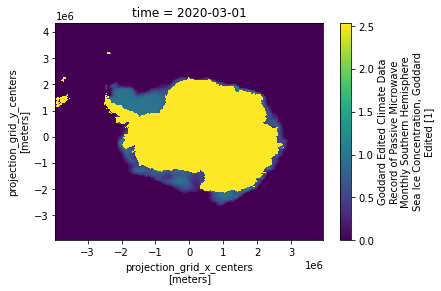

In [4]:
#make a simple plot of the variable `goddard_merged_seaice_conc_monthly`
march_2020['goddard_merged_seaice_conc_monthly'].plot()

# 2 Exclude grid cells which don't have sea ice
**Have a look at the `flag_values` and `flag_meanings`. You will want to remove data with both of these flags, use [`xarray.where`](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html) for this** <br>
**Hint: sea ice concentration can only be between 0 and 1, so values other than this should be excluded**

In [20]:
#use xarray.where to exclude values above 1
march_2020_new = march_2020['goddard_merged_seaice_conc_monthly'].where(march_2020['goddard_merged_seaice_conc_monthly']<=1)
march_2020_real = march_2020_new.where(march_2020_new>=0)

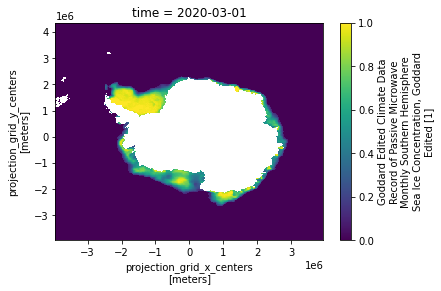

In [21]:
#plot your new data
march_2020_real.plot()

## 3 Weight the data
### 3.1 Make a grid cell file using `cdo`

In [13]:
#use cdo gridarea
!cdo gridarea seaice_conc_monthly_sh_f17_202003_v03r01.nc seaice_weights.nc

zsh:1: command not found: cdo


### 3.2 Check your cell area file looks right by using `ncdump` and/or 'xarray'

### 3.3 Multiply the sea ice concentration data by the area file 

### 3.4 Sum the data
**Use** `.sum('<coordinate>')`**, then plot your total sea ice area on a graph**
**Use the internet and try and find out if your answer looks right, remember to think about units!**

In [ ]:
#sum the data

In [ ]:
#plot the summed data

## 4 Extension
### Make code to:
- Download
- Read the downloaded files (x12)
- Mask grid cells that aren't sea ice
- Weight the grid cells (you can reuse you grid area file from (3)
- Sum to get sea ice area
- Plot the annual cycle for 2020, see if it look like the data shown [here](https://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/)

### 4.1 Download all NetCDF files for 2020

In [ ]:
#note it will be easiest to drag and drop the files from the ftp directory to your local directory

### 4.2 Read in the files

In [24]:
jan_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202001_v03r01.nc')
feb_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202002_v03r01.nc')
march_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202003_v03r01.nc')
apr_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202004_v03r01.nc')
may_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202005_v03r01.nc')
june_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202006_v03r01.nc')
july_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202007_v03r01.nc')
aug_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202008_v03r01.nc')
sep_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202009_v03r01.nc')
oct_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202010_v03r01.nc')
nov_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202011_v03r01.nc')
dec_2020 = xr.open_dataset('seaice_conc_monthly_sh_f17_202012_v03r01.nc')

### 4.3 Exclude non-sea ice grid cells

**January 2020**

In [33]:
jan_2020_godd = jan_2020['goddard_merged_seaice_conc_monthly'].where(jan_2020['goddard_merged_seaice_conc_monthly']<=1)
jan_2020_ex = jan_2020_godd.where(jan_2020_godd>=0)

**February 2020**

In [31]:
feb_2020_godd = feb_2020['goddard_merged_seaice_conc_monthly'].where(feb_2020['goddard_merged_seaice_conc_monthly']<=1)
feb_2020_ex = feb_2020_godd.where(feb_2020_godd>=0)

**March 2020**

In [30]:
march_2020_godd = march_2020['goddard_merged_seaice_conc_monthly'].where(march_2020['goddard_merged_seaice_conc_monthly']<=1)
march_2020_ex = march_2020_godd.where(march_2020_godd>=0)

**April 2020**

In [34]:
apr_2020_godd = apr_2020['goddard_merged_seaice_conc_monthly'].where(apr_2020['goddard_merged_seaice_conc_monthly']<=1)
apr_2020_ex = apr_2020_godd.where(march_2020_godd>=0)

**May 2020**

In [35]:
may_2020_godd = may_2020['goddard_merged_seaice_conc_monthly'].where(may_2020['goddard_merged_seaice_conc_monthly']<=1)
may_2020_ex = may_2020_godd.where(may_2020_godd>=0)

**June 2020**

In [36]:
june_2020_godd = june_2020['goddard_merged_seaice_conc_monthly'].where(june_2020['goddard_merged_seaice_conc_monthly']<=1)
june_2020_ex = june_2020_godd.where(june_2020_godd>=0)

**July 2020**

In [37]:
july_2020_godd = july_2020['goddard_merged_seaice_conc_monthly'].where(july_2020['goddard_merged_seaice_conc_monthly']<=1)
july_2020_ex = july_2020_godd.where(july_2020_godd>=0)

**August 2020**

In [38]:
aug_2020_godd = aug_2020['goddard_merged_seaice_conc_monthly'].where(aug_2020['goddard_merged_seaice_conc_monthly']<=1)
aug_2020_ex = aug_2020_godd.where(aug_2020_godd>=0)

**September 2020**

In [39]:
sep_2020_godd = sep_2020['goddard_merged_seaice_conc_monthly'].where(sep_2020['goddard_merged_seaice_conc_monthly']<=1)
sep_2020_ex = sep_2020_godd.where(sep_2020_godd>=0)

**October 2020**

In [40]:
oct_2020_godd = oct_2020['goddard_merged_seaice_conc_monthly'].where(oct_2020['goddard_merged_seaice_conc_monthly']<=1)
oct_2020_ex = oct_2020_godd.where(oct_2020_godd>=0)

**November 2020**may_2020_godd = 

In [41]:
nov_2020_godd = nov_2020['goddard_merged_seaice_conc_monthly'].where(nov_2020['goddard_merged_seaice_conc_monthly']<=1)
nov_2020_ex = nov_2020_godd.where(nov_2020_godd>=0)

**December 2020**

In [42]:
dec_2020_godd = dec_2020['goddard_merged_seaice_conc_monthly'].where(dec_2020['goddard_merged_seaice_conc_monthly']<=1)
dec_2020_ex = dec_2020_godd.where(dec_2020_godd>=0)

### 4.4 Weight the grid cells

In [45]:
jan_2020_weight = jan_2020_ex*25
feb_2020_weight = feb_2020_ex*25
march_2020_weight = march_2020_ex*25
apr_2020_weight = apr_2020_ex*25
may_2020_weight = may_2020_ex*25
june_2020_weight = june_2020_ex*25
july_2020_weight = july_2020_ex*25
aug_2020_weight = aug_2020_ex*25
sep_2020_weight = sep_2020_ex*25
oct_2020_weight = oct_2020_ex*25
nov_2020_weight = nov_2020_ex*25
dec_2020_weight = dec_2020_ex*25

### 4.5 Sum each of your months

In [47]:
jan_2020_sum = jan_2020_weight.sum()
feb_2020_sum = feb_2020_weight.sum()
march_2020_sum = march_2020_weight.sum()
apr_2020_sum = apr_2020_weight.sum()
may_2020_sum = may_2020_weight.sum()
june_2020_sum = june_2020_weight.sum()
july_2020_sum = july_2020_weight.sum()
aug_2020_sum = aug_2020_weight.sum()
sep_2020_sum = sep_2020_weight.sum()
oct_2020_sum = oct_2020_weight.sum()
nov_2020_sum = nov_2020_weight.sum()
dec_2020_sum = dec_2020_weight.sum()

### 4.6 Plot the annual cycle for 2020 and compare to real data

In [ ]:
#visually compare your data to the real data